In [2]:
import pandas as pd
import numpy as np

In [3]:
spacex = pd.read_csv('spacex.csv')
spacex

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


In [4]:
# Convert 'Date' from object to datetime format
spacex['Date'] = pd.to_datetime(spacex['Date'])

# Check for missing values
missing_data = spacex.isnull().sum()

# General summary statistics for numerical columns
summary_stats = spacex.describe()

missing_data, summary_stats


(FlightNumber       0
 Date               0
 BoosterVersion     0
 PayloadMass        0
 Orbit              0
 LaunchSite         0
 Outcome            0
 Flights            0
 GridFins           0
 Reused             0
 Legs               0
 LandingPad        26
 Block              0
 ReusedCount        0
 Serial             0
 Longitude          0
 Latitude           0
 Class              0
 dtype: int64,
        FlightNumber                 Date   PayloadMass    Flights      Block  \
 count     90.000000                   90     90.000000  90.000000  90.000000   
 mean      45.500000  2017-11-05 09:04:00   6104.959412   1.788889   3.500000   
 min        1.000000  2010-06-04 00:00:00    350.000000   1.000000   1.000000   
 25%       23.250000  2016-07-24 18:00:00   2510.750000   1.000000   2.000000   
 50%       45.500000  2018-02-17 00:00:00   4701.500000   1.000000   4.000000   
 75%       67.750000  2019-08-03 00:00:00   8912.750000   2.000000   5.000000   
 max       90.000000  

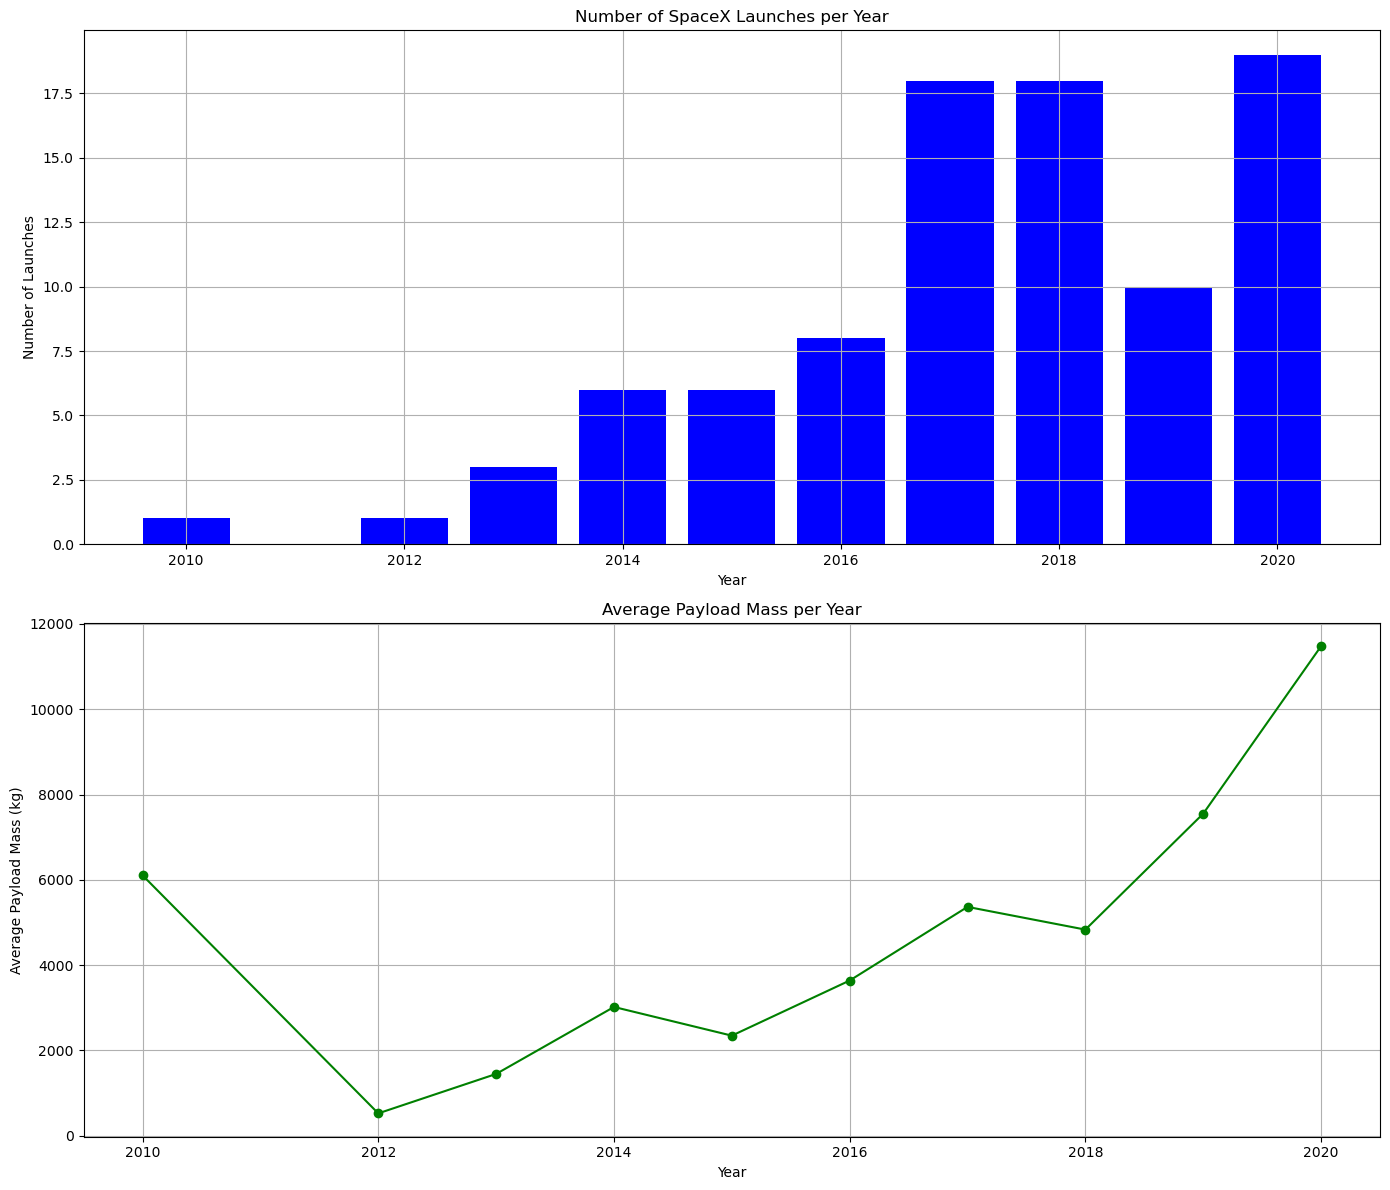

In [5]:
import matplotlib.pyplot as plt

launches_per_year = spacex.groupby(spacex['Date'].dt.year).size()

payload_mass_per_year = spacex.groupby(spacex['Date'].dt.year)['PayloadMass'].mean()

fig, ax = plt.subplots(2, 1, figsize=(14, 12))

ax[0].bar(launches_per_year.index, launches_per_year.values, color='blue')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Launches')
ax[0].set_title('Number of SpaceX Launches per Year')
ax[0].grid(True)

ax[1].plot(payload_mass_per_year.index, payload_mass_per_year.values, marker='o', linestyle='-', color='green')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Average Payload Mass (kg)')
ax[1].set_title('Average Payload Mass per Year')
ax[1].grid(True)

plt.tight_layout()
plt.show()


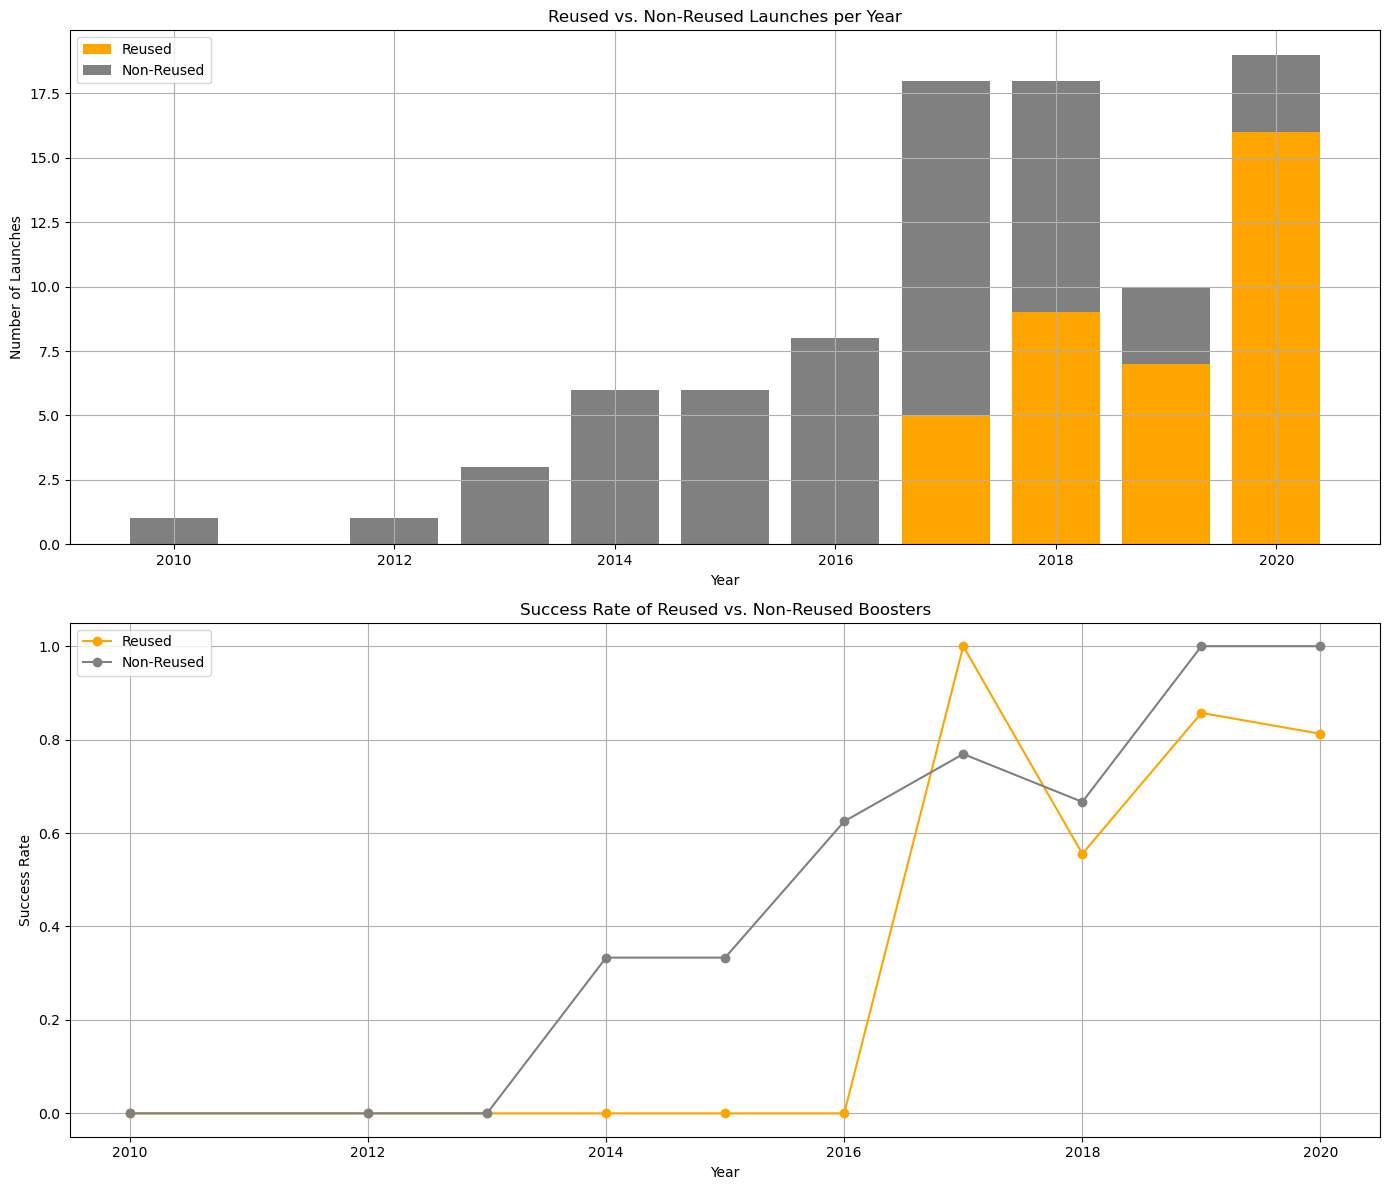

In [6]:
reused_launches_per_year = spacex[spacex['Reused']].groupby(spacex['Date'].dt.year).size()
non_reused_launches_per_year = spacex[~spacex['Reused']].groupby(spacex['Date'].dt.year).size()

success_rate_reused = spacex[spacex['Reused']].groupby(spacex['Date'].dt.year)['Class'].mean()
success_rate_non_reused = spacex[~spacex['Reused']].groupby(spacex['Date'].dt.year)['Class'].mean()

all_years = sorted(set(reused_launches_per_year.index).union(non_reused_launches_per_year.index))

reused_launches_aligned = reused_launches_per_year.reindex(all_years, fill_value=0)
non_reused_launches_aligned = non_reused_launches_per_year.reindex(all_years, fill_value=0)

fig, ax = plt.subplots(2, 1, figsize=(14, 12))

ax[0].bar(reused_launches_aligned.index, reused_launches_aligned.values, color='orange', label='Reused')
ax[0].bar(non_reused_launches_aligned.index, non_reused_launches_aligned.values, bottom=reused_launches_aligned.values, color='grey', label='Non-Reused')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Launches')
ax[0].set_title('Reused vs. Non-Reused Launches per Year')
ax[0].legend()
ax[0].grid(True)

success_rate_reused_aligned = success_rate_reused.reindex(all_years, fill_value=0)
success_rate_non_reused_aligned = success_rate_non_reused.reindex(all_years, fill_value=0)

ax[1].plot(success_rate_reused_aligned.index, success_rate_reused_aligned.values, marker='o', linestyle='-', color='orange', label='Reused')
ax[1].plot(success_rate_non_reused_aligned.index, success_rate_non_reused_aligned.values, marker='o', linestyle='-', color='grey', label='Non-Reused')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Success Rate')
ax[1].set_title('Success Rate of Reused vs. Non-Reused Boosters')
ax[1].legend()
ax[1].grid(True)

# Show the updated plots
plt.tight_layout()
plt.show()


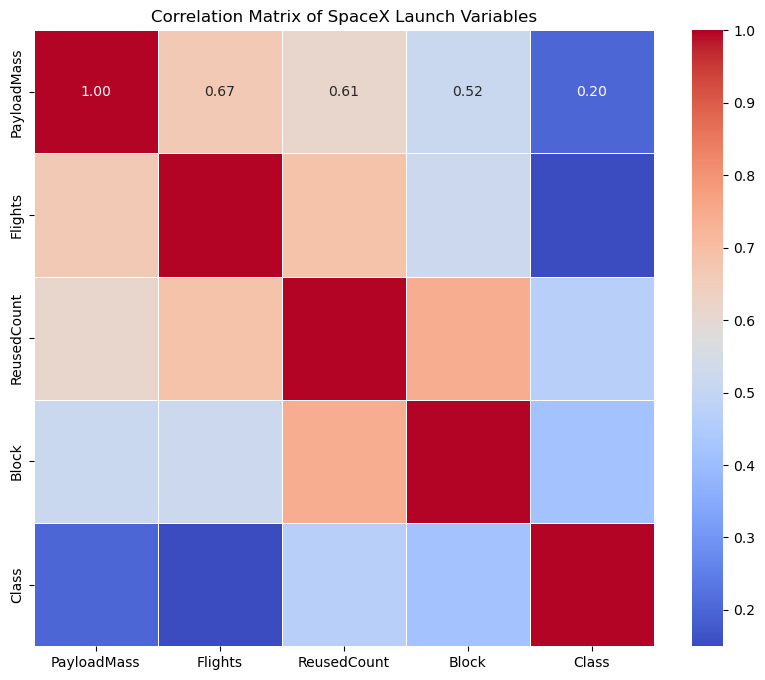

'\nCorrelation Analaysis of numeric features\n'

In [7]:
import seaborn as sns

# Select relevant columns for correlation analysis
correlation_data = spacex[['PayloadMass', 'Flights', 'ReusedCount', 'Block', 'Class']]

# Calculate the Pearson correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of SpaceX Launch Variables')
plt.show()

"""
Correlation Analaysis of numeric features
"""


In [8]:
""""Preprocessing for including correlation analysis of categorical features"""

# Applying pd.get_dummies to convert categorical variables into dummy variables
features = spacex[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Class']]
features = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features.astype('float')



,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
# Calculate the extended Pearson correlation matrix
ext_correlation_matrix = features.corr()
ext_correlation_matrix


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
FlightNumber,1.000000,0.596307,0.652842,0.442364,0.635844,0.373619,0.932411,0.735193,0.401923,-0.132606,...,0.155653,0.250330,0.059163,0.264202,0.063243,0.197160,0.268045,0.269798,0.287106,0.181568
PayloadMass,0.596307,1.000000,0.665218,0.258011,0.468393,0.192318,0.518165,0.612327,0.199992,-0.125673,...,0.221510,0.380222,-0.080194,0.307128,-0.038712,0.028755,0.168585,-0.005114,0.216980,-0.055037
Flights,0.652842,0.665218,1.000000,0.194457,0.782631,0.157727,0.519603,0.684802,0.149787,-0.069315,...,0.216505,0.379069,-0.069315,0.283688,-0.069315,0.127122,0.032495,0.127122,0.032495,-0.069315
GridFins,0.442364,0.258011,0.194457,1.000000,0.229341,0.902302,0.438023,0.410324,0.642540,0.056659,...,0.115278,0.142857,0.056659,0.129641,-0.198307,0.115278,0.099258,0.115278,0.099258,0.056659
Reused,0.635844,0.468393,0.782631,0.229341,1.000000,0.155552,0.548036,0.594109,0.207582,-0.088566,...,0.148539,0.229341,-0.088566,0.191692,-0.088566,0.148539,0.096447,0.148539,0.096447,-0.088566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Serial_B1056,0.197160,0.028755,0.127122,0.115278,0.148539,0.111565,0.203920,0.170486,0.038125,-0.022861,...,-0.046512,-0.057639,-0.022861,-0.052307,-0.022861,1.000000,-0.040048,-0.046512,-0.040048,-0.022861
Serial_B1058,0.268045,0.168585,0.032495,0.099258,0.096447,0.096061,0.175582,0.037608,0.131306,-0.019684,...,-0.040048,-0.049629,-0.019684,-0.045038,-0.019684,-0.040048,1.000000,-0.040048,-0.034483,-0.019684
Serial_B1059,0.269798,-0.005114,0.127122,0.115278,0.148539,0.111565,0.203920,0.170486,0.152499,-0.022861,...,-0.046512,-0.057639,-0.022861,-0.052307,-0.022861,-0.046512,-0.040048,1.000000,-0.040048,-0.022861
Serial_B1060,0.287106,0.216980,0.032495,0.099258,0.096447,0.096061,0.175582,0.037608,0.131306,-0.019684,...,-0.040048,-0.049629,-0.019684,-0.045038,-0.019684,-0.040048,-0.034483,-0.040048,1.000000,-0.019684


In [10]:

# Since the matrix can be very large, let's focus on correlations related to the target variable 'Class'
correlations_with_class = ext_correlation_matrix['Class'].sort_values(ascending=False)

correlations_with_class.head(20)  # Display the top correlations with 'Class'


Class                                  1.000000
Legs                                   0.673825
GridFins                               0.642540
ReusedCount                            0.466584
Block                                  0.416015
FlightNumber                           0.401923
LandingPad_5e9e3032383ecb6bb234e7ca    0.322329
LandingPad_5e9e3032383ecb267a34e7c7    0.223495
LandingPad_5e9e3033383ecbb9e534e7cc    0.208013
Reused                                 0.207582
PayloadMass                            0.199992
Serial_B1049                           0.188982
Orbit_VLEO                             0.173422
Serial_B1051                           0.171499
Orbit_SSO                              0.171499
Serial_B1059                           0.152499
Flights                                0.149787
Serial_B1058                           0.131306
Serial_B1060                           0.131306
LaunchSite_KSC LC 39A                  0.127973
Name: Class, dtype: float64

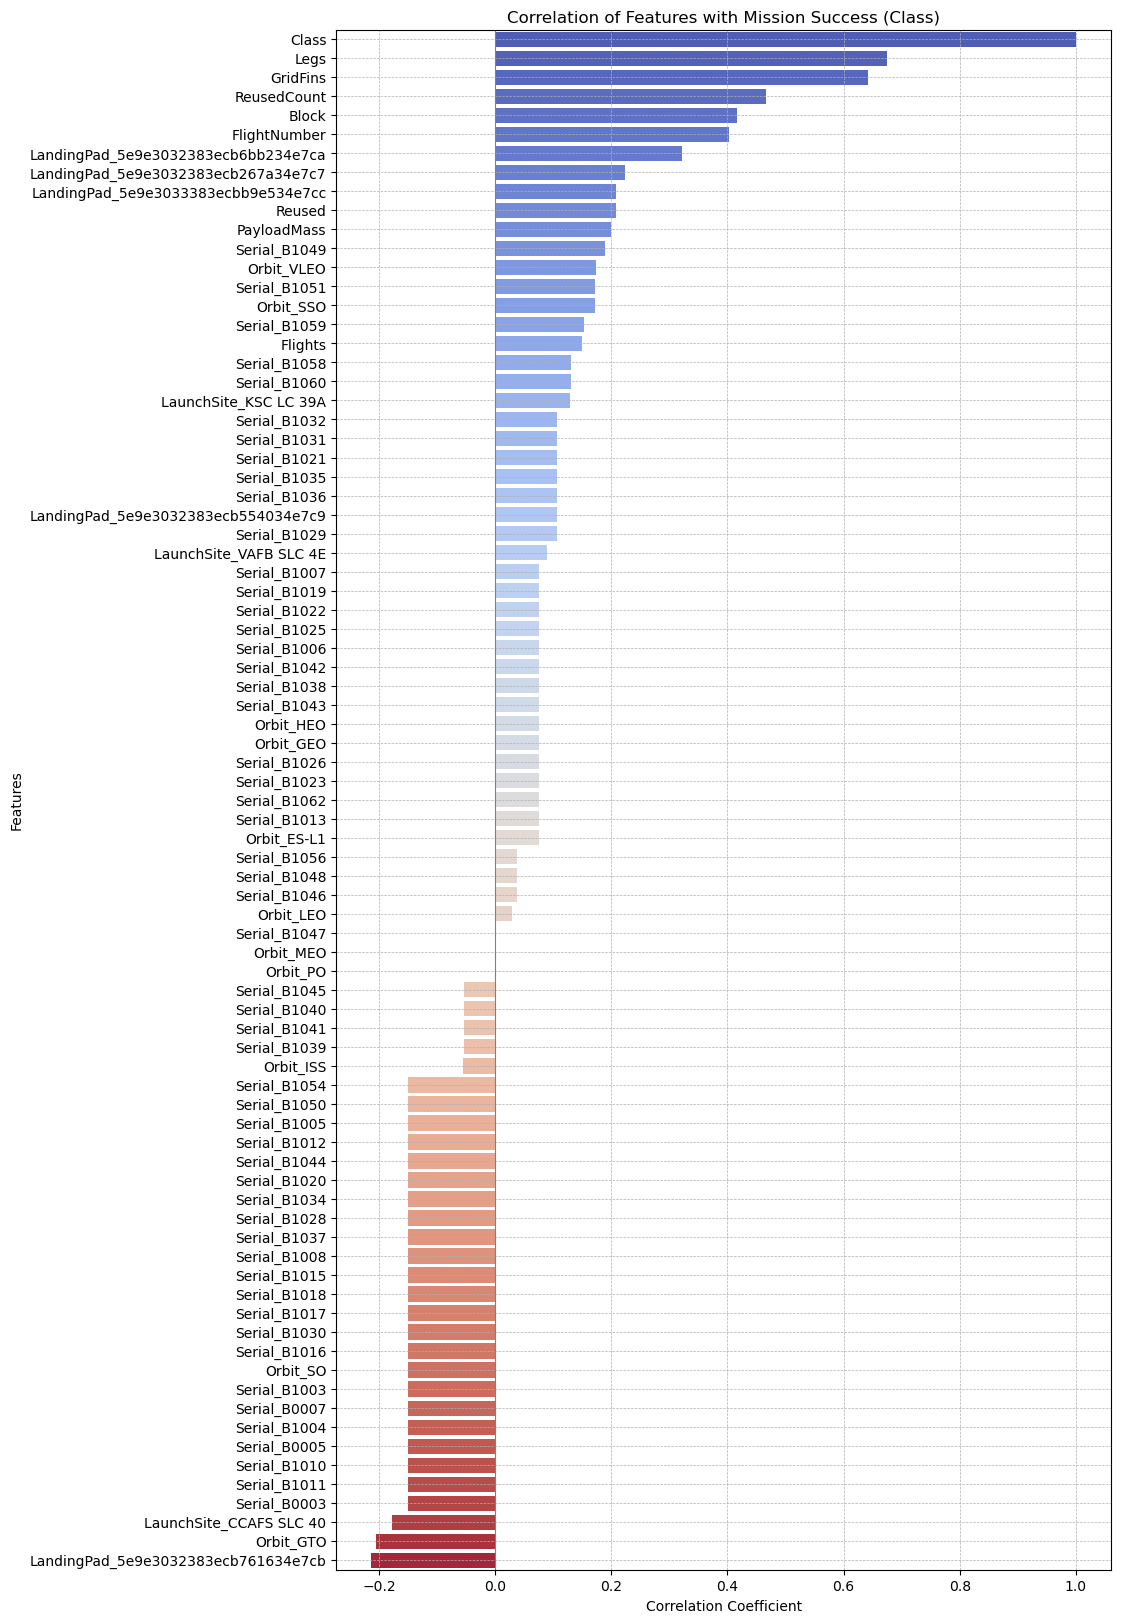

In [11]:
# Focusing on the correlation with the 'Class' variable for visualization
correlation_with_class_frame = pd.DataFrame(correlations_with_class).reset_index()
correlation_with_class_frame.columns = ['Feature', 'Correlation with Class']

# Plotting the correlations as a bar plot for better visibility
plt.figure(figsize=(10, 20))
sns.barplot(data=correlation_with_class_frame.sort_values('Correlation with Class', ascending=False),
            y='Feature', x='Correlation with Class', palette='coolwarm')
plt.title('Correlation of Features with Mission Success (Class)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axvline(x=0, color='grey', linewidth=0.8)  # Adding a vertical line at zero for reference
plt.savefig('spacex_correlation_bar')
plt.show()


/Users/ykwim/Desktop/Data Science Fundamentals/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ykwim/Desktop/Data Science Fundamentals/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ykwim/Desktop/Data Science Fundamentals/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


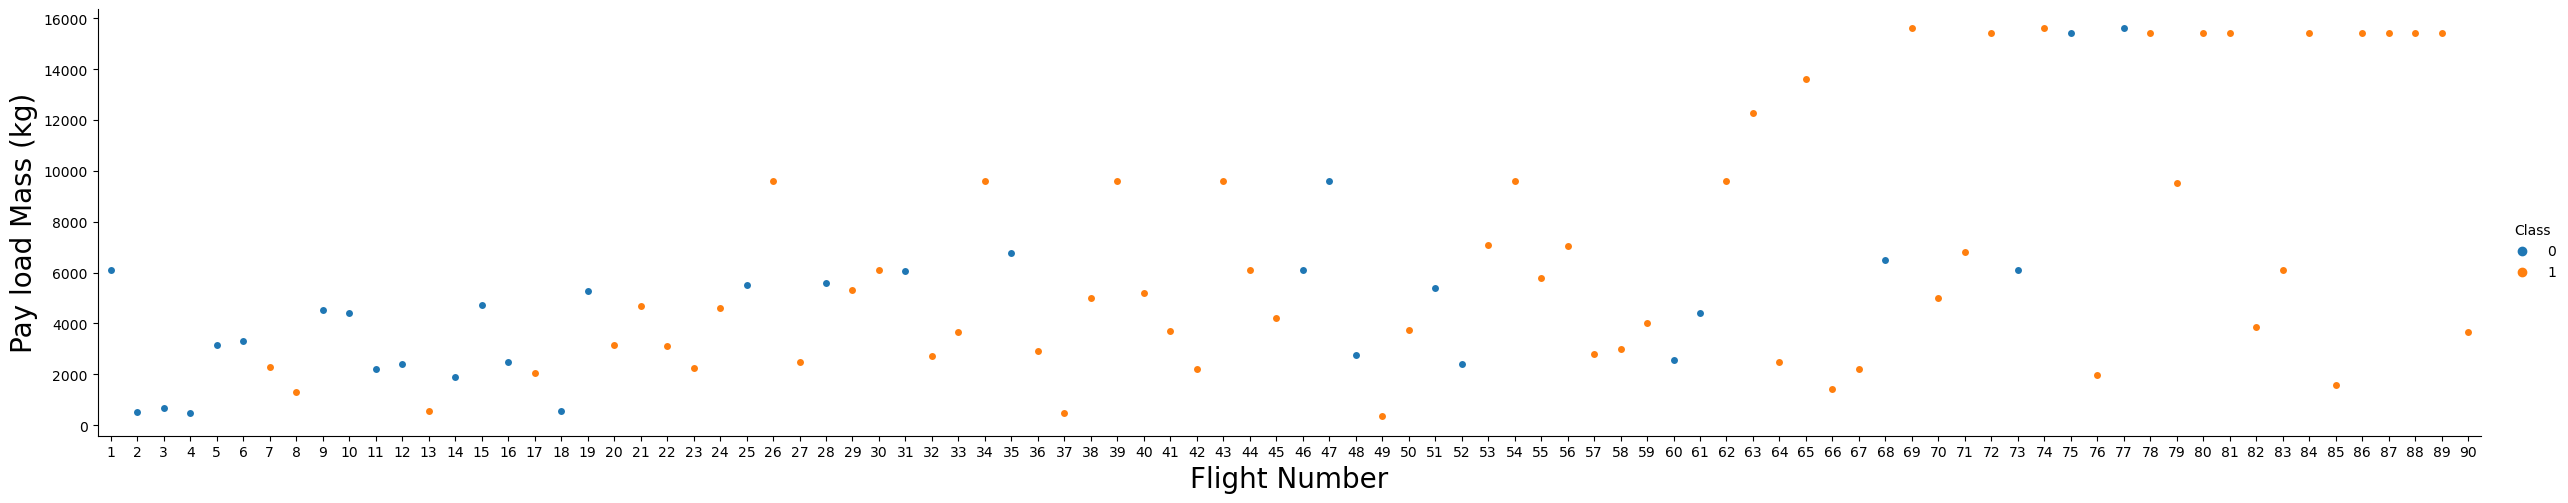

In [61]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=spacex, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

/Users/ykwim/Desktop/Data Science Fundamentals/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ykwim/Desktop/Data Science Fundamentals/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ykwim/Desktop/Data Science Fundamentals/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


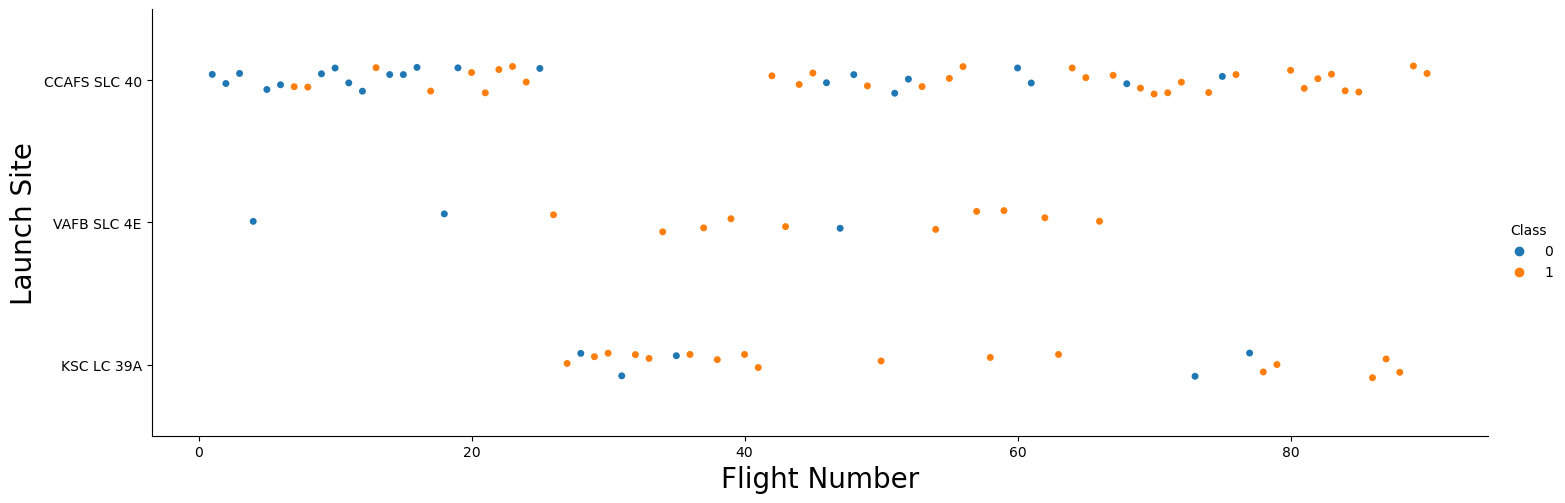

In [62]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=spacex, aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

/Users/ykwim/Desktop/Data Science Fundamentals/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ykwim/Desktop/Data Science Fundamentals/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ykwim/Desktop/Data Science Fundamentals/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


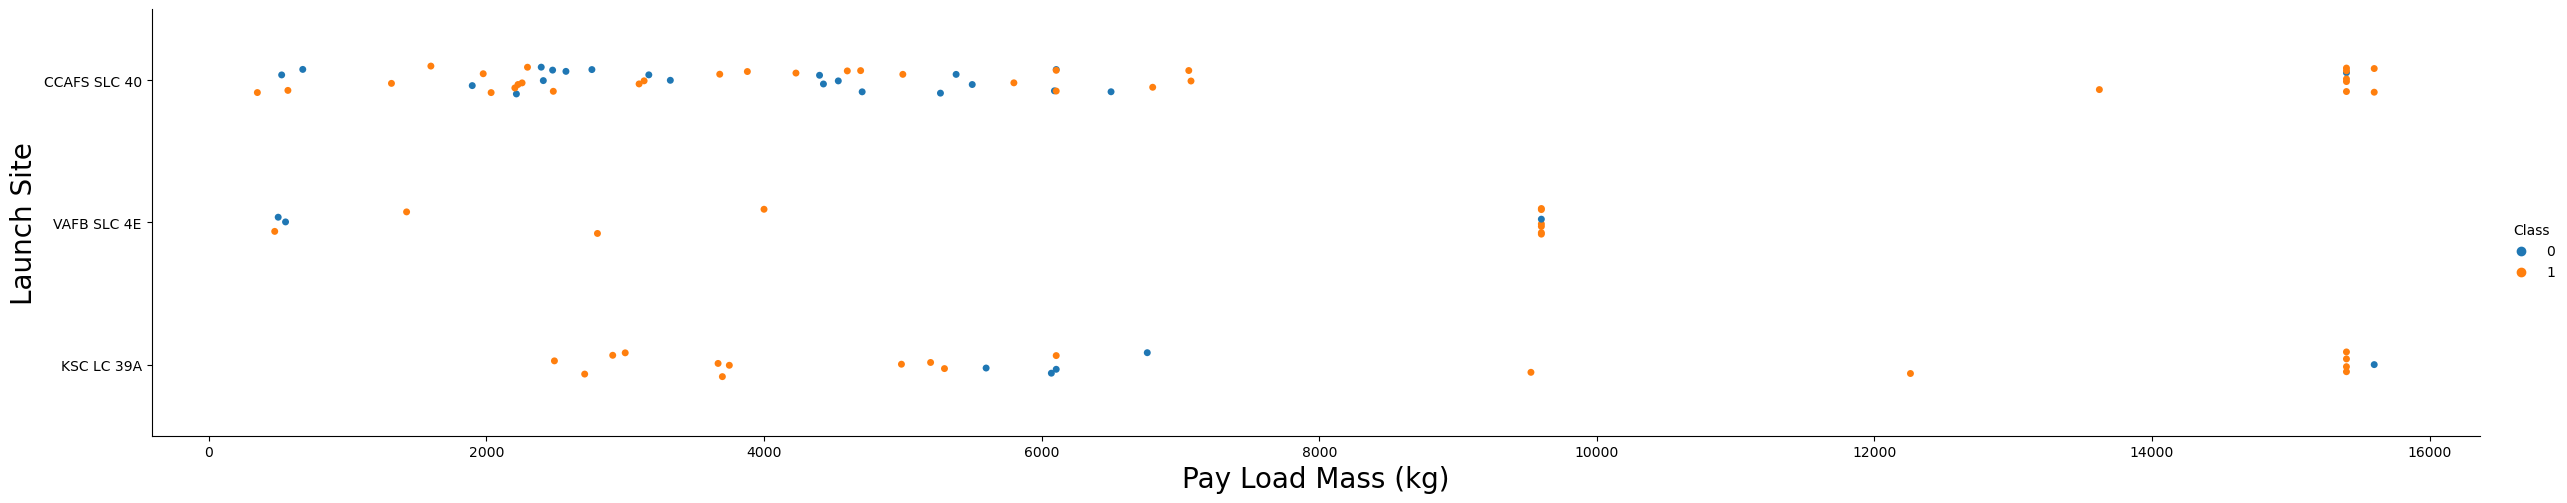

In [63]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=spacex, aspect = 5)
plt.xlabel("Pay Load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

/var/folders/1_/zp10z5v90dn5bgttj8zxyykr0000gn/T/ipykernel_9115/2873893549.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Orbit', y='Class', data=orbit_success_rates, ci=None)


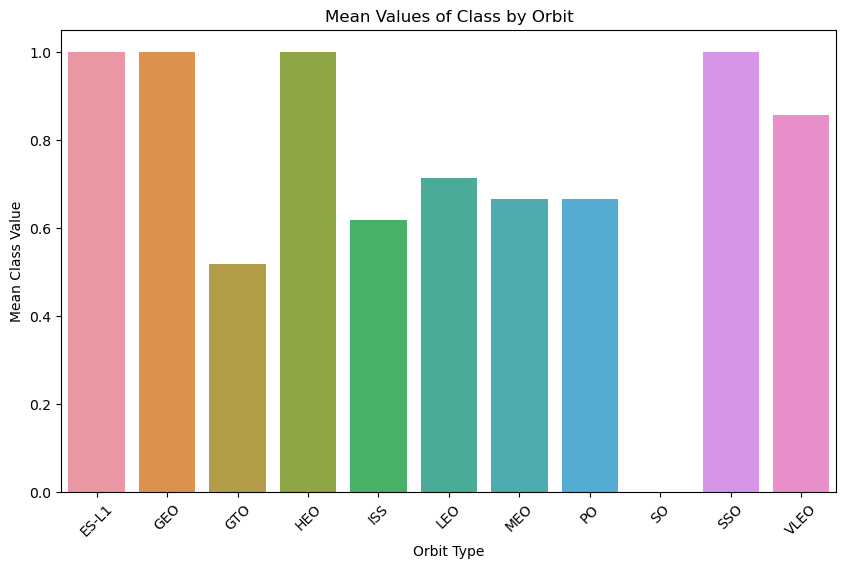

In [64]:
orbit_success_rates = spacex.groupby('Orbit')['Class'].mean()
orbit_success_rates = orbit_success_rates.reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(x='Orbit', y='Class', data=orbit_success_rates, ci=None)

plt.title('Mean Values of Class by Orbit')
plt.xlabel('Orbit Type')
plt.ylabel('Mean Class Value')
plt.xticks(rotation=45)
plt.show()

/Users/ykwim/Desktop/Data Science Fundamentals/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ykwim/Desktop/Data Science Fundamentals/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ykwim/Desktop/Data Science Fundamentals/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


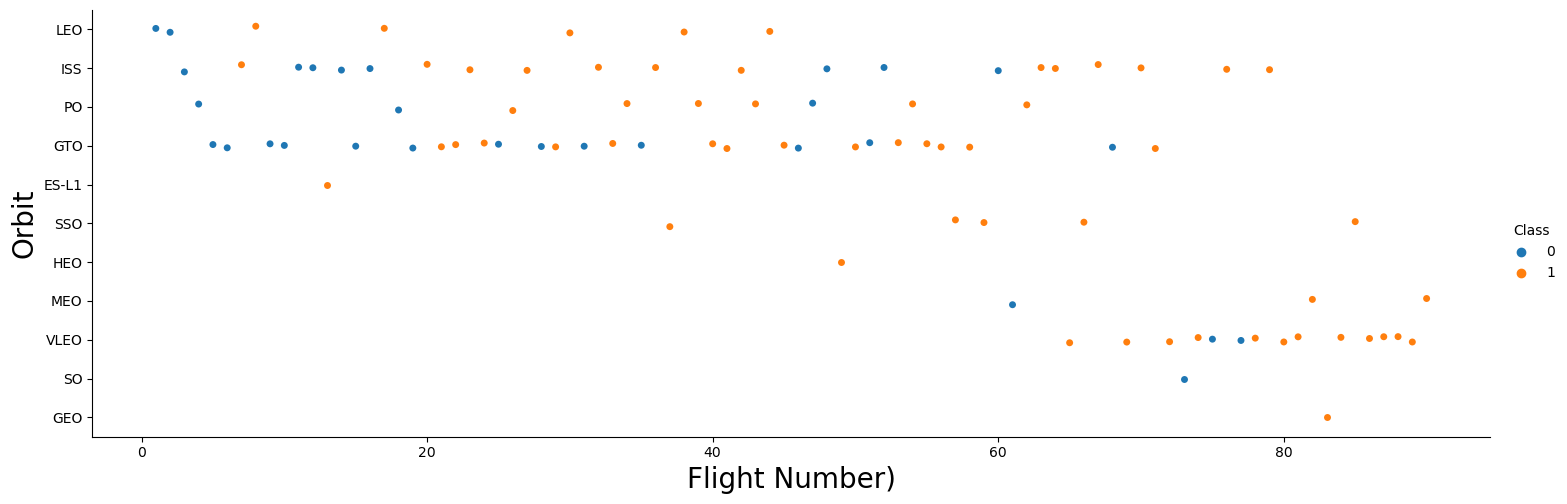

In [65]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=spacex, aspect = 3)
plt.xlabel("Flight Number)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()



/Users/ykwim/Desktop/Data Science Fundamentals/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ykwim/Desktop/Data Science Fundamentals/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ykwim/Desktop/Data Science Fundamentals/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


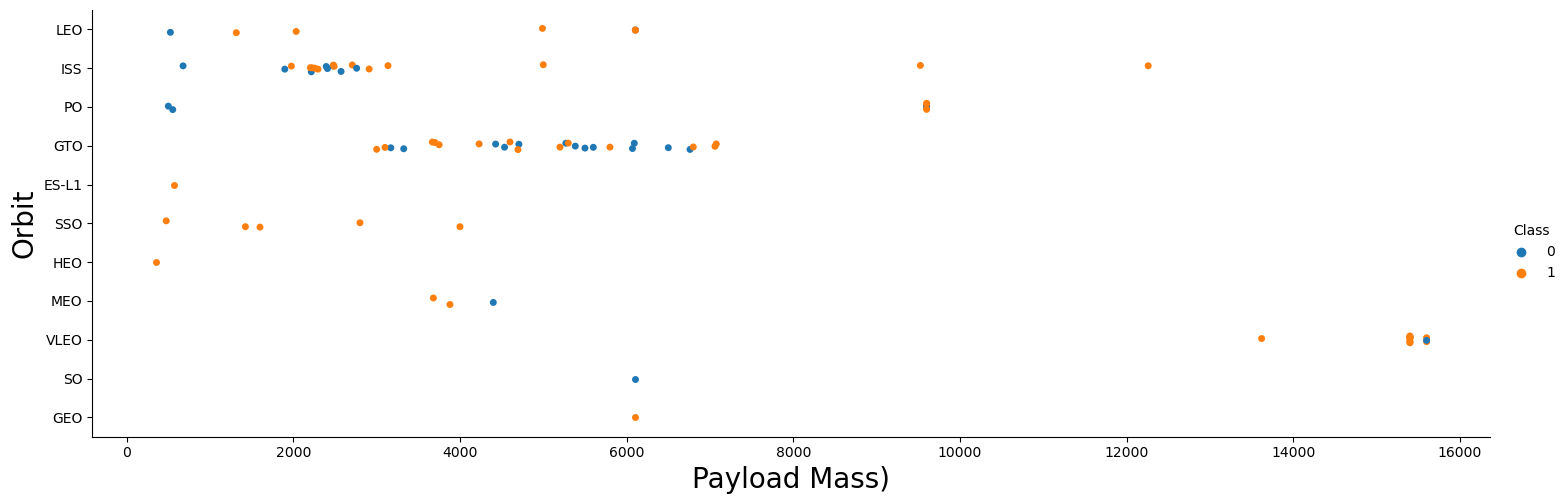

In [70]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=spacex, aspect = 3)
plt.xlabel("Payload Mass)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()